In [531]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
from collections import Counter
import matplotlib.pyplot as plt

In [532]:
csv_file_path = '/home/lucas/UFOP/ple_2020/analise_midias_sociais/final-work/data/all_pp_posts_bolsonaro_posts.csv'
df_candidate = pd.read_csv(csv_file_path,encoding = 'utf-8')

In [533]:
# convertendo o tipo data que esta como string em objeto no formato data
df_candidate["created_time"] = pd.to_datetime(df_candidate['created_time'])

In [534]:
df_candidate.head(15)

,created_time,id,pre_processed_message,message_min_processed,shares,status_type,full_picture,reactions_like,reactions_haha,reactions_wow,reactions_sad,reactions_angry,reactions_love,has_textual_message
0,2020-03-22 18:47:55+00:00,211857482296579_1826486634166981,agor videoconferenc president jair bolsonar pr...,- agora por videoconferencia o presidente jair...,23151,added_photos,https://scontent.xx.fbcdn.net/v/t1.0-0/p180x54...,129465,147,318,21,112,10345,True
1,2020-03-22 16:30:39+00:00,211857482296579_1826339070848404,inscrico seleca profission atuaca program medi...,- as inscricoes para a selecao de 5.800 profis...,5703,mobile_status_update,None,52238,128,61,5,43,2514,True
2,2020-03-22 13:37:26+00:00,211857482296579_1826130007535977,ministeri saud ministr mandett reunia virtual ...,- estamos no ministerio da saude com o ministr...,11818,added_photos,https://scontent.xx.fbcdn.net/v/t1.0-0/p180x54...,97986,73,141,16,65,6292,True
3,2020-03-22 11:07:01+00:00,211857482296579_1825937284221916,govern federal distribu milho test rap covid t...,- o governo federal distribui milhoes de teste...,39284,mobile_status_update,None,165539,88,393,20,68,16747,True
4,2020-03-22 02:06:48+00:00,211857482296579_1825422034273441,cham precauca medic barat cas venh ser comprov...,- isso se chama precaucao . o medicamento e ba...,27236,added_photos,https://scontent.xx.fbcdn.net/v/t1.0-9/9052732...,162513,968,318,88,509,20723,True
5,2020-03-21 22:22:48+00:00,211857482296579_1825061764309468,reconhec seriedad moment temor muit brasileir ...,- reconheco a seriedade do momento e o temor d...,40794,added_photos,https://scontent.xx.fbcdn.net/v/t1.0-9/9065012...,305358,918,478,266,1267,48834,True
6,2020-03-21 18:36:01+00:00,211857482296579_1824728371009474,hospital albert einstein possivel cur pacient ...,- hospital albert einstein e a possivel cura d...,201803,added_video,https://scontent.xx.fbcdn.net/v/t15.5256-10/75...,215237,480,815,60,431,34278,True
7,2020-03-21 11:33:30+00:00,211857482296579_1824261207722857,dois ded pros ratinh assist link youtub,- dois dedos de prosa com ratinho . - assista ...,33971,added_video,https://scontent.xx.fbcdn.net/v/t15.5256-10/83...,106117,336,317,113,624,15368,True
8,2020-03-21 02:37:00+00:00,211857482296579_1823872341095077,assin med provisor deix clar ser competenc fed...,- assinei medida provisoria deixando claro ser...,9174,added_photos,https://scontent.xx.fbcdn.net/v/t1.0-9/s720x72...,112873,181,200,106,1121,7582,True
9,2020-03-21 00:16:41+00:00,211857482296579_1823743497774628,via eduard bolsonar,via eduardo bolsonaro,8150,added_photos,https://scontent.xx.fbcdn.net/v/t1.0-0/p600x60...,79762,435,111,13,160,6480,True


In [535]:
n_total_posts = len(df_candidate)
print('número total de posts: {0}'.format(str(n_total_posts)))

número total de posts: 3646


In [536]:
n_posts_with_textual_messages = df_candidate[df_candidate.has_textual_message == True].shape[0]
n_posts_without_textual_messages = df_candidate[df_candidate.has_textual_message == False].shape[0]

print('número de posts com mensagens textuais: {0}'.format(str(n_posts_with_textual_messages)))
print('número de posts sem mensagens textuais: {0}'.format(str(n_posts_without_textual_messages)))

número de posts com mensagens textuais: 3394
número de posts sem mensagens textuais: 252


In [537]:
# Devemos remover esses posts sem menssagem antes de continuar a nossa análise?
# renomear depois o df caso sim

#filter_mask  = df_candidate['has_textual_message'] == True
#df_candidate = df_candidate[filter_mask]
#print('número de posts do df desconsiderando os posts sem menssagens textuais: {0}'.format(str(len(df_candidate))))

In [538]:
# separando o df de treinamento (30%) e o df de testes(70%) de maneira 'embaralhada'
df_training, df_test = train_test_split(df_candidate,train_size=0.7,test_size=0.3,shuffle=True)

In [539]:
print('número de posts do conjunto de treinamento (70%): {0}'.format(str(len(df_training))))
df_training.head(5)

número de posts do conjunto de treinamento (70%): 2552


,created_time,id,pre_processed_message,message_min_processed,shares,status_type,full_picture,reactions_like,reactions_haha,reactions_wow,reactions_sad,reactions_angry,reactions_love,has_textual_message
2258,2017-01-15 12:55:00+00:00,211857482296579_762057753943213,pt direit laranj jacqu wagn vot apen instrumen...,o pt e a sua direita laranja . para jacques wa...,5521,added_video,https://scontent.xx.fbcdn.net/v/t15.5256-10/15...,20906,148,65,7,104,558,True
1709,2017-12-16 19:43:55+00:00,211857482296579_970597886422531,maior motiv ida manaus educaca,- nosso maior motivo pela ida a manaus : educa...,1502,added_video,https://scontent.xx.fbcdn.net/v/t15.5256-10/24...,9347,17,58,0,2,576,True
3150,2015-03-03 18:24:27+00:00,211857482296579_452050998277225,ongs tent barr bolsonar comissa direit human v...,mais de 100 ongs tentam barrar bolsonaro na co...,6579,shared_story,https://external.xx.fbcdn.net/safe_image.php?d...,31238,0,0,0,0,0,True
3162,2015-02-13 17:16:09+00:00,211857482296579_443878462427812,port arma anos aut resistenc aproveit cheg qua...,porte de arma - 16 anos - auto de resistencia ...,6222,shared_story,https://external.xx.fbcdn.net/safe_image.php?d...,24082,0,0,0,0,0,True
2919,2015-11-16 18:42:30+00:00,211857482296579_556749561140701,fal public manchet jornal correi braziliens cu...,o falado e o publicado - manchete do jornal co...,8202,added_video,https://scontent.xx.fbcdn.net/v/t15.5256-10/12...,27806,1,3,1,1,5,True


In [540]:
print('número de posts do conjunto de teste (30%): {0}'.format(str(len(df_test))))
df_test.head(5)

número de posts do conjunto de teste (30%): 1094


,created_time,id,pre_processed_message,message_min_processed,shares,status_type,full_picture,reactions_like,reactions_haha,reactions_wow,reactions_sad,reactions_angry,reactions_love,has_textual_message
597,2019-11-07 22:01:33+00:00,211857482296579_1226416837541763,liv quintafeir president assunt seman link youtub,- live de quinta-feira com o presidente - assu...,12173,added_video,https://scontent.xx.fbcdn.net/v/t15.5256-10/71...,84971,767,286,94,258,15038,True
3178,2015-01-12 21:40:39+00:00,211857482296579_430810363734622,netinh paul raul gil sbt jan bolsonar exempl s...,netinho de paula no raul gil - sbt - 10/jan/20...,3596,shared_story,https://external.xx.fbcdn.net/safe_image.php?d...,33195,0,0,0,0,0,True
894,2019-06-13 22:00:19+00:00,211857482296579_498636164213192,,,17856,added_video,https://scontent.xx.fbcdn.net/v/t15.5256-10/61...,81468,631,296,122,406,22235,False
360,2020-01-30 14:27:13+00:00,211857482296579_1763878353761143,quas r bilha r milho economiz grac aco realiz ...,- em 2019 quase r $ 1 bilhao ( r $ 961 milhoes...,6343,mobile_status_update,None,55616,68,194,4,12,3781,True
1651,2018-01-16 13:37:13+00:00,211857482296579_989397034542616,autarqu ensin superior garanhuns obrig pernambuc,- autarquia do ensino superior de garanhuns . ...,1836,added_video,https://scontent.xx.fbcdn.net/v/t15.5256-10/24...,8974,157,27,1,6,835,True


In [541]:
#============================================================================================
# realizando o tf idf no df['pre_processed_message'] de treinamento
#============================================================================================

# instanciando o objeto para fazer o tf-idf
tfidf_vectorizer = TfidfVectorizer(analyzer='word')

# converte os documentos em matrizes
tfidf_matrix = tfidf_vectorizer.fit_transform(df_training['pre_processed_message'])

# obtendo as palavras (tokens)
tfidf_tokens = tfidf_vectorizer.get_feature_names()

# gerando o tf-idf em um df
# colunas são as palavras processadas
# linhas são os documentos (post 1, post 2,post 3,post 4)
df_tfidf_df = pd.DataFrame(data = tfidf_matrix.toarray(),columns = tfidf_tokens)


print("\nTF-IDF\n")
df_tfidf_df.head(10)


TF-IDF



,aacd,abaix,abandon,abastec,abat,abav,abenco,aberraca,abert,abertur,...,zeland,zelos,zer,zl,zoe,zoeir,zon,zueir,zuer,zumb
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.194334,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.093737,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [542]:
# Aplicando uma máscara para identificar o tf-idf de certas palavras

filter_mask  = df_tfidfvect['zarattin'] != 0.0
df_tfidf_token_mask = df_tfidfvect[filter_mask]

print(df_tfidf_token_mask)

      abaix  abandon  abastec  abat  abav  abcz  abdelmassih  abenco  \
463     0.0      0.0      0.0   0.0   0.0   0.0          0.0     0.0   
1342    0.0      0.0      0.0   0.0   0.0   0.0          0.0     0.0   

      aberraco  abert  ...  zarattin   ze  zec  zelos  zer   zl  zoeir  zon  \
463        0.0    0.0  ...  0.430778  0.0  0.0    0.0  0.0  0.0    0.0  0.0   
1342       0.0    0.0  ...  0.356042  0.0  0.0    0.0  0.0  0.0    0.0  0.0   

      zueir  zuer  
463     0.0   0.0  
1342    0.0   0.0  

[2 rows x 6535 columns]


In [552]:
#============================================================================================

count_vectorizer = CountVectorizer(max_features=40000)

document_term_matrix = count_vectorizer.fit_transform(df_training['pre_processed_message'])

print('after vectorization: \n{}'.format(document_term_matrix))

after vectorization: 
  (0, 5170)	1
  (0, 2032)	1
  (0, 3698)	1
  (0, 3553)	1
  (0, 6523)	1
  (0, 6513)	1
  (0, 405)	1
  (0, 3434)	1
  (0, 4863)	1
  (0, 1797)	1
  (0, 4264)	1
  (0, 6344)	1
  (0, 4258)	1
  (1, 3889)	1
  (1, 4205)	1
  (1, 3194)	1
  (1, 3915)	1
  (1, 2183)	1
  (2, 2032)	1
  (2, 4452)	1
  (2, 6072)	1
  (2, 683)	1
  (2, 792)	1
  (2, 1326)	1
  (2, 3174)	1
  :	:
  (2549, 4470)	1
  (2549, 661)	1
  (2549, 4609)	1
  (2549, 5761)	1
  (2549, 554)	1
  (2549, 322)	1
  (2549, 3005)	1
  (2549, 2705)	1
  (2549, 4213)	1
  (2549, 769)	1
  (2549, 4571)	1
  (2549, 2577)	1
  (2550, 792)	1
  (2550, 6383)	1
  (2550, 1200)	1
  (2550, 5359)	1
  (2550, 5712)	1
  (2550, 716)	1
  (2550, 5512)	1
  (2550, 20)	1
  (2550, 4349)	1
  (2550, 1167)	1
  (2550, 5553)	1
  (2550, 3447)	1
  (2550, 504)	1


In [553]:
# Define helper functions
def get_mean_topic_vectors(keys, two_dim_vectors):
    '''
    returns a list of centroid vectors from each predicted topic category
    '''
    mean_topic_vectors = []
    for t in range(n_topics):
        articles_in_that_topic = []
        for i in range(len(keys)):
            if keys[i] == t:
                articles_in_that_topic.append(two_dim_vectors[i])    
        
        articles_in_that_topic = np.vstack(articles_in_that_topic)
        mean_article_in_that_topic = np.mean(articles_in_that_topic, axis=0)
        mean_topic_vectors.append(mean_article_in_that_topic)
    return mean_topic_vectors


def get_top_n_words(n_top_words, count_vectorizer, text_data):
    '''
    returns a tuple of the top n words in a sample and their 
    accompanying counts, given a CountVectorizer object and text sample
    '''
    vectorized_headlines = count_vectorizer.fit_transform(text_data.values)
    vectorized_total = np.sum(vectorized_headlines, axis=0)
    word_indices = np.flip(np.argsort(vectorized_total)[0,:], 1)
    word_values = np.flip(np.sort(vectorized_total)[0,:],1)
    
    word_vectors = np.zeros((n_top_words, vectorized_headlines.shape[1]))
    for i in range(n_top_words):
        word_vectors[i,word_indices[0,i]] = 1

    words = [word[0].encode('ascii').decode('utf-8') for 
             word in count_vectorizer.inverse_transform(word_vectors)]

    return (words, word_values[0,:n_top_words].tolist()[0])


# Define helper functions
def get_keys(topic_matrix):
    '''
    returns an integer list of predicted topic 
    categories for a given topic matrix
    '''
    keys = topic_matrix.argmax(axis=1).tolist()
    return keys

def keys_to_counts(keys):
    '''
    returns a tuple of topic categories and their 
    accompanying magnitudes for a given list of keys
    '''
    count_pairs = Counter(keys).items()
    categories = [pair[0] for pair in count_pairs]
    counts = [pair[1] for pair in count_pairs]
    return (categories, counts)

In [554]:
n_topics = 10
lda_model = LatentDirichletAllocation(n_components=n_topics, learning_method='online', 
                                          random_state=0, verbose=0)

lda_topic_matrix = lda_model.fit_transform(document_term_matrix)

In [555]:
#==================================================================
# pegando o argmax de cada entrada na matriz de tópico 
# para obter a categoria de tópico prevista para cada título.
# Essas categorias de tópicos podem ser caracterizadas por suas palavras mais frequentes.
#==================================================================

lda_keys = get_keys(lda_topic_matrix)
lda_categories, lda_counts = keys_to_counts(lda_keys)

In [556]:
# Define helper functions
def get_top_n_words(n, keys, document_term_matrix, count_vectorizer):
    '''
    returns a list of n_topic strings, where each string contains the n most common 
    words in a predicted category, in order
    '''
    top_word_indices = []
    for topic in range(n_topics):
        temp_vector_sum = 0
        for i in range(len(keys)):
            if keys[i] == topic:
                temp_vector_sum += document_term_matrix[i]
        temp_vector_sum = temp_vector_sum.toarray()
        top_n_word_indices = np.flip(np.argsort(temp_vector_sum)[0][-n:],0)
        top_word_indices.append(top_n_word_indices)   
    top_words = []
    for topic in top_word_indices:
        topic_words = []
        for index in topic:
            temp_word_vector = np.zeros((1,document_term_matrix.shape[1]))
            temp_word_vector[:,index] = 1
            the_word = count_vectorizer.inverse_transform(temp_word_vector)[0][0]
            topic_words.append(the_word.encode('ascii').decode('utf-8'))
        top_words.append(" ".join(topic_words))         
    return top_words

In [557]:
'''
Assim, convertemos nossa pequena amostra inicial de posts em uma lista 
de categorias de tópicos previstos, onde cada categoria é caracterizada por suas palavras mais frequentes.
As magnitudes relativas de cada uma dessas categorias podem ser facilmente 
visualizadas através do uso de um gráfico de barras.
'''

top_n_words_lda = get_top_n_words(10, lda_keys, document_term_matrix, count_vectorizer)

for i in range(len(top_n_words_lda)):
    print("Topic {}: ".format(i+1), top_n_words_lda[i])

Topic 1:  president the of obrig and brasil mr venezuel ceas bolsonar
Topic 2:  brasil bolsonar tod youtub link obrig acim dia jair rio
Topic 3:  brasil ministeri govern econom tod bilho infraestrutur ministr estad brasileir
Topic 4:  consideraca grat sao paul apoi tod obrig vereador bolsonar candidat
Topic 5:  nao bolsonar pt brasil part vot pod jair ser vid
Topic 6:  brasil alvor boa mour parabens tod janeir palmeir possivel ped
Topic 7:  bolsonar brasil jair nao deput sao direit milit federal eduard
Topic 8:  obrig abrac brasil grand sobr bolsonar nord jair ministr president
Topic 9:  tod boa noit brasil cas bolsonar nao parabens federal bolsonab
Topic 10:  brasil obrig terror sp guaruj nao cesar battist part italian


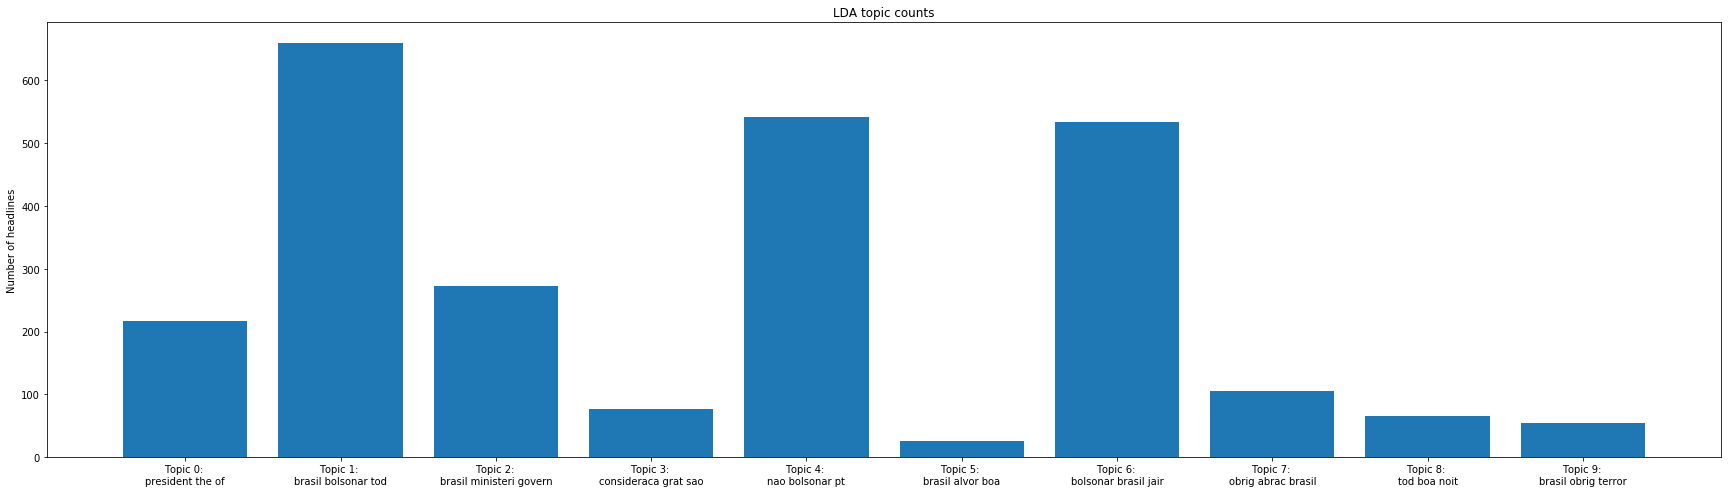

In [558]:
# As composições de tópico relativas da amostra são então iluminadas com um gráfico de barras.

top_3_words = get_top_n_words(3, lda_keys, document_term_matrix, count_vectorizer)
labels = ['Topic {}: \n'.format(i) + top_3_words[i] for i in lda_categories]

fig, ax = plt.subplots(figsize=(30,8))
ax.bar(lda_categories, lda_counts);
ax.set_xticks(lda_categories);
ax.set_xticklabels(labels);
ax.set_title('LDA topic counts');
ax.set_ylabel('Number of headlines');

In [561]:
tsne_lda_model = TSNE(n_components=2, perplexity=50, learning_rate=100, 
                        n_iter=2000, verbose=1, random_state=0, angle=0.75)

tsne_lda_vectors = tsne_lda_model.fit_transform(lda_topic_matrix)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 2552 samples in 0.004s...
[t-SNE] Computed neighbors for 2552 samples in 0.152s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2552
[t-SNE] Computed conditional probabilities for sample 2000 / 2552
[t-SNE] Computed conditional probabilities for sample 2552 / 2552
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 64.429810
[t-SNE] KL divergence after 2000 iterations: 0.680673
